#Ideias

1. Fazer uma função que vai junto com o pip install e que faz a parte do infer_vector e já cria as features com esses vetores inferidos para a pessoa. Possível problema: consistência de dados seria complicadinha de fazer, pois ia depender do dataframe da pessoa. 

2. Fazer referências entre tutoriais.

3. Pensar em uma estrutura base para todos os tutoriais, para seguirem uma mesma ideia de desenvolvimento e não ficarem muito diferentes uns dos outros.

4. Pensar em uma imagem para representar o projeto, seria interessante talvez.

**LINKS:**

1. https://arxiv.org/pdf/1405.4053.pdf

2. https://medium.com/@amarbudhiraja/understanding-document-embeddings-of-doc2vec-bfe7237a26da

3. https://aclanthology.org/W16-1609.pdf

4. https://heartbeat.fritz.ai/getting-started-with-doc2vec-2645e3e9f137

5. https://shuzhanfan.github.io/2018/08/understanding-word2vec-and-doc2vec/

6. http://dspace.unipampa.edu.br/bitstream/riu/1601/1/An%C3%A1lise%20de%20sentimento%20usando%20a%20representa%C3%A7%C3%A3o%20distribu%C3%ADda%20de%20par%C3%A1grafos%20para%20o%20portugu%C3%AAs.pdf


**O QUE FALTA FAZER:**

1. Comentar (com bloco de texto mesmo) mais didaticamente o que foi feito a partir da seção "De textos para vetores" até o final.

2. Arrumar o tamanho da imagem do PV-DBOW (ideia mas que talvez polua o notebook: Usar o IPython.display).

3. Retirar as funções de limpeza (mas só depois de estar tudo certo com o pip install delas).

4. Verificar se é necessário fazer o que foi feito com o PV-DBOW com o PV-DM. Foi feito apenas para o PV-DBOW, window-size = 100, epochs = 20. Se for, criar duas seções: PV-DBOW e PV-DM (ver formato - teoria - aplicação - teoria - aplicação **ou** do jeito que está agora)

5. Revisar tudo o que foi escrito, procurar erros conceituais e gramaticais. Qualquer coisa motivar mais na introdução.

# Introdução

Um dos grandes desafios de algoritmos de ciência da computação é a implementação numérica de textos e documentos, por isso novas abordagens são essenciais para que possamos concretamente analisar novas formas de realizar uma representação vetorial de documentos sem a perda de sentido entre as palavras. Neste sentido, apresentamos uma breve explicação de um modelo que é visto como uma extensão do Word2Vec, previamente descrito, denominado **Doc2Vec** ou **Paragraph Vector** - Vetor de Parágrafos.

Proposto por Tomas Mikolov e Quoc Le, ambos funcionários do Google na época do desenvolvimento do modelo (2014), o artigo original pode ser encontrado e lido aqui: [Distributed Representations of Sentences and Documents](https://arxiv.org/pdf/1405.4053.pdf).

##O que é o Doc2Vec e como funciona

Como dito acima, o Doc2Vec, também chamado de $\textit{Paragraph Vector}$ (Vetor de Paragráfos), pode ser visto como uma extensão do Word2Vec no sentido de, no caso do Word2Vec, cujo objetivo é a representação de palavras no espaço real d-dimensional ($R^d$, $\,$ $d \in \textbf{Z}^{+}$), ser utilizado para a representação de documentos no espaço d-dimensional.

O Vetor de Paragráfos é um algoritmo não supervisionado que aprende representações vetoriais diferentes para as palavras de variados textos. O seu nome, por sua vez, enfatiza o fato que podemos utilizá-lo para textos de diversos tamanhos, desde simples sentenças até enormes documentos.

Agora veremos brevemente a estrutura do Vetor de Parágrafos.

## Estrutura do Doc2Vec

O Doc2Vec possui duas variações: PV-DM e DBOW, possuindo algumas características com o Word2Vec. Explicaremos brevemente como essas variações funcionam abaixo. 

### PV-DM: Paragraph Vector - Distributed Memory

Essa abordagem se assemelha ao CBOW (Continuous Bag-Of-Words) do Word2Vec, uma vez que recebe como entrada as palavras de contexto (uma vizinhança da palavra $\textit{target}$) e retorna a palavra com maior probabilidade de pertencer àquele contexto. Porém uma diferença se torna presente: a presença de uma matriz de paragráfos (representada por D na figura abaixo), realizando o mapeamento dos paragráfos para vetores distintos de palavras. Representando a informação perdida de um determinado contexto.

Assim, cada parágrafo é mapeado para um único vetor, que representa uma coluna em **D** e cada palavra também é mapeada para um único vetor, que representa cada coluna em **W**. Depois disso, é feita a média ou concatenação desses vetores para a predição da próxima palavra no contexto, que possuem tamanho fixo e são escolhidos a partir de um tamaho de janela especificado que percorre o parágrafo.



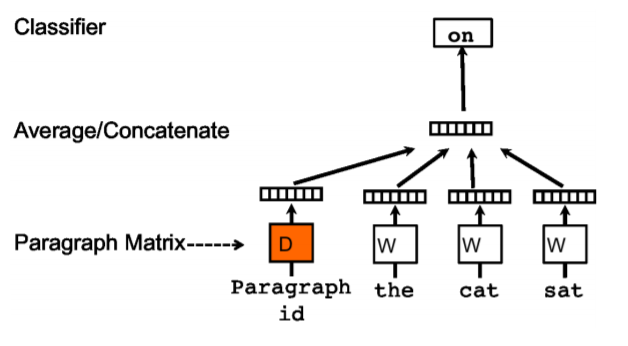

O token de parágrafos funciona memorizando o que está faltando do contexto e por isso o nome Distributed Memory.  

Durante cada etapa do treinamento, um contexto de tamanho fixo é selecionado aleatoriamente de um parágrafo e é calculado o erro para o ajuste dos parâmetros do modelo.

Para a predição, é necessário um vetor de parágrafos de teste para calcular para um outro vetor de parágrafos novo, e então feita a inferência nesse conjunto de teste nunca antes visto pelo modelo. Nesta fase, os parâmetros do modelo e os vetores de palavras **W** estão fixos.

Após o treinamento, o Vetor de Parágrafos pode ser utilizado como *features* em modelos convencionais, como a Regressão Logística, CatBoost, Florestas Aleatórias, XGBoost, etc. 

Algumas vatangens dos Vetores de Parágrafos são o fato deles utilizarem dados não rotulados e fornecerem uma boa generalização do modelo de Skip-Gram para altas dimensões, preservando a semântica e a ordem das palavras. 


### PV-DBOW: Paragraph Vector - Distributed Bag-Of-Words

Essa abordagem, por sua vez, é semelhante ao Skip-Gram do Word2Vec, ou seja, no caso desse modelo, dado uma palavra, o objetivo é prever o contexto. No DBOW, é utilizado o Vetor de Paragráfos para prever a vizinhança de uma determinada palavra, em uma janela fixa.

E também pode ser visto como o modelo acima, sendo que os vetores de palavras **W** são ignorados durante o processo de treinamento e o modleo é forçado a prever palavras escolhidas aleatoriamente do parágrafo.



A imagem abaixo representa um esquema simplificado de como PV-DBOW atua.

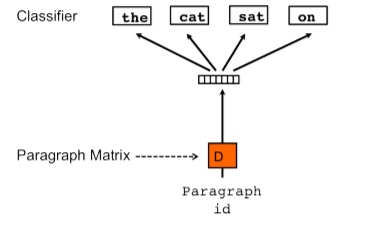

Como vantagem, essa abordagem requere menos armazenamento, sendo assim mais eficiente, uma vez que os vetores de palavras são ignorados.

#Hands-On

Agora vamos ver uma aplicação do Doc2Vec em um conjunto de dados de textos jurídicos com seus status: Ativo, Suspenso ou Arquivado. Comecemos com a parte brevemente descritiva e de pré-processamento dos dados. 

##Importando

Vamos importar as bibliotecas necessárias para a utilização do modelo.

In [1]:
from google.colab import drive
from IPython.display import clear_output

import re
!pip install ftfy
import ftfy

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

!pip install git+https://github.com/legalnlp21/legalnlp
from legalnlp.clean_functions import *
clear_output()

Célula de comando para fazer o download do modelo Doc2Vec pré-treinado.

In [ ]:
from legalnlp.get_premodel import *
get_premodel("wdocdbow")

Aqui vamos importar o conjunto de dados no qual iremos trabalhar neste tutorial:

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/legalnlp21/legalnlp/main/demo/data_base.csv')
data.drop(columns=['Unnamed: 0'],inplace=True)

E uma breve visualização desses dados:

In [5]:
data.head()

,text,label
0,Ofício Requisitório - Comunicação - Protocolo ...,H:Arquivado
1,Suspensão do Prazo Prazo referente ao usuário ...,H:Ativo
2,Certidão de Publicação Expedida Relação :0274/...,H:Ativo
3,Embargos de Declaração Juntados Nº Protocolo: ...,H:Ativo
4,Certidão de Trânsito em Julgado com Baixa Expe...,H:Arquivado


Esse conjunto de dados possui 6449 observações e 2 variáveis.

Vamos ver agora se temos dados faltantes:

In [ ]:
print("Quantidade de dados faltantes: ", data.isna().any().sum())

Quantidade de dados faltantes:  0


Isso é bom.Não temos nenhum dado faltante! Porém, vemos que os dados precisam ser limpos antes de serem aplicados no modelo, então vamos aplicar um função que limpa essas observações da coluna $text$.

Aplicamos então a função de limpeza na coluna $text$:

In [6]:
data['text'] = data['text'].apply(lambda x: clean(x))

E obtemos os dados agora limpos, vamos dar uma olhada:

In [ ]:
str(data.loc[1,'text'])

'suspensão do prazo prazo referente ao usuário foi alterado para [data] devido à alteração da tabela de feriados'

## Carregando o Modelo

Agora vamos carregar o modelo Doc2Vec pré-treinado, com abordagem PV-DBOW, de tamanho: $size = 100$ e tamanho de janela: $window\_size = 15$.

In [ ]:
model = Doc2Vec.load('/content/W2V-D2V_SG-DBOW/W2V-D2V_DBOW-SG/w2v_d2v_dbow_size_100_window_15_epochs_20')

Com o modelo carregado, podemos utilizar alguns métodos fornecidos na documentação da biblioteca [Gensim](https://radimrehurek.com/gensim/models/doc2vec.html) para o Doc2Vec.

Com o modelo pré-treinado, podemos inferir novos vetores para novas senteças. 

In [ ]:
model.infer_vector("Textos Jurídicos")

array([-0.10254373, -0.18363476, -0.02936422, -0.26012328,  0.17503804,
        0.15294589, -0.30269313, -0.01351696,  0.17990673, -0.10944664,
        0.02290293, -0.08590016, -0.02467895, -0.0681726 ,  0.31408077,
       -0.09521789, -0.21906905,  0.1091972 ,  0.02772989, -0.46195573,
       -0.43412396, -0.03955771, -0.21206893, -0.13284746,  0.05983553,
       -0.09878086, -0.31219062,  0.03777533,  0.1341872 ,  0.5678964 ,
        0.0775323 , -0.09070289, -0.13612549, -0.38952157, -0.3284215 ,
       -0.0357866 ,  0.04917519, -0.37434772,  0.03747596,  0.05197837,
       -0.11342482, -0.24667172, -0.29049036, -0.45630977, -0.04901775,
       -0.06747887, -0.42158127, -0.2278865 , -0.45322508, -0.19521797,
       -0.332434  , -0.13486056,  0.21964446,  0.0192291 , -0.18086755,
       -0.1789962 , -0.05051066,  0.21899165, -0.13164954, -0.48117948,
       -0.1619793 ,  0.06489025,  0.23658197,  0.13270578,  0.01437261,
       -0.18148006,  0.31241888, -0.07876957, -0.1663735 , -0.10

In [ ]:
model.wv.similar_by_word("banco")

[('brasil', 0.7986418008804321),
 ('banco_itaú', 0.6769572496414185),
 ('banco_mercantil', 0.6748969554901123),
 ('bradesco', 0.665328860282898),
 ('banrisul', 0.6483218669891357),
 ('banco_santander', 0.6408952474594116),
 ('santander', 0.6307247877120972),
 ('agência', 0.6243692636489868),
 ('bnb', 0.6186673641204834),
 ('caixa_econômica_federal', 0.604042112827301)]

##De textos para vetores

Primeiramente vamos transformar as $labels$ aplicando o LabelEncoder da biblioteca sklearn.

In [ ]:
encoder = LabelEncoder()
data['encoded'] = encoder.fit_transform(encoder.fit_transform(data['label']))
data.loc[[0, 1, 5]]

,text,label,encoded
0,ofício requisitório - - comunicação - - protoc...,H:Arquivado,0
1,suspensão do prazo prazo referente ao usuário ...,H:Ativo,1
5,certidão de publicação expedida relação : [num...,H:Suspenso,2


Agora vamos inferir os textos para obter vetores.

In [ ]:
from tqdm import tqdm

In [ ]:
def vetor_inferido(texto):

  string = str(texto).split()

  inferido = model.infer_vector(string, steps = 20, alpha = 0.025)
  
  vetores = np.array(inferido)

  return vetores

In [ ]:
data['infered'] = data['text'].apply(lambda x: vetor_inferido(x))

In [ ]:
data.head(5)

,text,label,encoded,infered
0,ofício requisitório - - comunicação - - protoc...,H:Arquivado,0,"[0.02513257, -0.019499889, -0.19484688, 0.0606..."
1,suspensão do prazo prazo referente ao usuário ...,H:Ativo,1,"[-0.1440759, 0.15502283, -0.114558, -0.4538768..."
2,certidão de publicação expedida relação : [num...,H:Ativo,1,"[-0.03951993, -0.13895936, -0.36792997, 0.1424..."
3,embargos de declaração juntados nº protocolo :...,H:Ativo,1,"[0.1317874, -0.1855162, -0.2365917, 0.10818264..."
4,certidão de trânsito em julgado com baixa expe...,H:Arquivado,0,"[0.16249715, -0.03565246, -0.15349378, -0.1812..."


In [ ]:
for i in range(0, 100):
  data[str(i)] = np.vstack(data.loc[:, 'infered'])[:, i]

In [ ]:
data.head(5)

,text,label,encoded,infered,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,ofício requisitório - - comunicação - - protoc...,H:Arquivado,0,"[0.02513257, -0.019499889, -0.19484688, 0.0606...",0.025133,-0.019500,-0.194847,0.060680,-0.040422,-0.201382,-0.292102,0.227289,0.193984,0.031357,0.120070,0.104116,0.382811,0.103667,0.186678,-0.011655,0.224733,0.082665,0.360533,-0.042550,0.057715,-0.080280,-0.447570,0.067697,-0.028238,-0.033540,-0.281391,0.297436,0.153838,0.085633,-0.030596,0.067525,-0.154469,-0.217801,-0.179989,-0.142348,...,-0.014145,-0.028608,-0.130046,-0.104482,-0.241033,-0.174901,-0.083040,-0.269312,-0.302384,0.051824,0.103994,-0.242494,-0.125526,0.252905,-0.308890,-0.068749,0.023824,-0.087565,-0.163838,0.150332,0.009400,0.417363,0.225590,-0.018421,-0.078664,0.068349,-0.185055,0.232687,-0.116524,-0.020122,-0.125318,0.143251,-0.264414,-0.246316,0.219467,-0.071902,0.027145,0.193812,0.031260,-0.385873
1,suspensão do prazo prazo referente ao usuário ...,H:Ativo,1,"[-0.1440759, 0.15502283, -0.114558, -0.4538768...",-0.144076,0.155023,-0.114558,-0.453877,-0.191272,0.097791,-0.027968,-0.047757,0.156432,-0.030890,0.284521,-0.141697,-0.020147,0.135399,0.247448,-0.086102,-0.250684,0.179127,0.509067,-0.033868,0.038835,0.273066,-0.428759,-0.023926,-0.097320,-0.044343,-0.108040,0.322565,0.183091,0.314366,-0.033179,0.331051,-0.055740,-0.046578,-0.018195,-0.302891,...,0.055544,0.308407,0.120122,-0.444418,0.249392,0.155530,0.252702,-0.240252,0.066730,-0.143240,-0.018594,-0.157301,-0.413849,-0.104576,-0.108766,0.276648,0.056775,0.232979,-0.284354,0.042221,0.167966,0.040458,0.484896,0.262973,0.007717,-0.060220,0.057678,0.151309,0.054679,-0.180332,-0.096029,0.241978,-0.010377,-0.087314,0.314460,0.341285,0.038010,-0.095047,0.050013,-0.178952
2,certidão de publicação expedida relação : [num...,H:Ativo,1,"[-0.03951993, -0.13895936, -0.36792997, 0.1424...",-0.039520,-0.138959,-0.367930,0.142430,-0.330144,0.348456,0.128629,0.348273,0.211633,0.095755,0.097671,-0.174525,0.314891,0.190061,0.196098,0.020930,0.219338,0.238664,0.479711,-0.094282,0.245826,-0.126603,-0.802750,0.059728,-0.021257,-0.272894,-0.360014,0.215249,-0.079761,0.108832,0.013075,0.090895,0.102666,-0.074522,-0.275216,-0.226115,...,0.125168,-0.137667,0.217903,0.097333,-0.047533,-0.131815,0.107820,-0.320032,0.483978,-0.347992,0.130280,-0.417816,-0.082607,0.131826,-0.394384,0.234627,-0.264254,0.179247,-0.259147,-0.097191,0.264726,0.703827,0.168668,0.012278,-0.080585,-0.042606,-0.199339,0.203786,0.250491,-0.133648,0.059114,0.066135,0.475035,-0.022621,0.376316,0.217107,0.111298,0.183042,0.454460,-0.401469
3,embargos de declaração juntados nº protocolo :...,H:Ativo,1,"[0.1317874, -0.1855162, -0.2365917, 0.10818264...",0.131787,-0.185516,-0.236592,0.108183,-0.158718,0.178843,0.045683,0.030265,0.056168,0.022982,0.130710,-0.299545,-0.270175,0.250194,0.474217,0.097218,0.240924,0.093421,0.210133,-0.131541,-0.212405,0.220114,-0.327415,0.059133,-0.033590,-0.074598,-0.192622,-0.003495,0.035865,0.299555,-0.459573,0.393306,0.090439,-0.055645,-0.231561,-0.183000,...,-0.201904,0.151402,-0.038357,-0.205031,-0.003291,0.027172,0.021952,-0.090821,-0.042976,-0.101753,0.274536,-0.120874,-0.370090,0.147758,-0.278019,0.196887,-0.274128,0.090474,-0.196825,-0.014252,0.180706,0.311970,0.288358,-0.562223,0.053209,0.101475,-0.069819,0.305066,0.054650,-0.116364,0.035325,0.101353,0.006171,-0.138762,0.086261,0.161057,0.341711,0.231459,-0.020059,-0.664150
4,certidão de trânsito em julgado com baixa expe...,H:Arquivado,0,"[0.16249715, -0.03565246, -0.15349378, -0.1812...",0.162497,-0.035652,-0.153494,-0.181242,-0.008440,0.030090,-0.440054,0.257965,0.321397,0.117578,0.123671,0.002541,0.375499,0.250435,0.320079,0.352612,-0.227191,0.210197,0.510530,-0.322123,0.129027,0.261613,-0.310429,0.334771,-0.280901,-0.022502,-0.096098,0.057036,0.274372,0

### Dados de Treino e Teste

In [ ]:
x_train = data.drop(columns = ['encoded', 'text', 'label', 'infered'])[:4500]
x_test = data.drop(columns = ['encoded', 'text', 'label', 'infered'])[4500:]
y_train = data['encoded'][:4500] 
y_test = data['encoded'][4500:]
 
x_train, x_test, y_train, y_test = train_test_split( data.drop(columns = ['encoded', 'text', 'label', 'infered']), data['encoded'], random_state = 42, test_size = 0.3)

In [ ]:
# Tamanhos dos x e y de treino e teste
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4514, 100)
(1935, 100)
(4514,)
(1935,)


##Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Instanciando o modelo de Regressão Logística em que será feito o cross-validaton em seguida
log_reg = LogisticRegression(max_iter = 1000,
                             random_state = 42, 
                             solver = 'liblinear')

log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Definindo o espaço de busca de parâmetros
space = dict()
space['solver'] = ['liblinear']#, 'lbfgs']
space['penalty'] = ['l1']
space['C'] = np.logspace(-3, 3, 100)

rscv = RandomizedSearchCV(log_reg, space, cv = 3, n_jobs = -1, verbose = 1, random_state = 42, n_iter = 30)

# Fazendo o cross-validation
result = rscv.fit(x_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   47.5s finished


In [ ]:
# Melhores hiperparâmetros
print('Melhor acurácia: %s' % result.best_score_)
print('Melhores Hiperparâmetros: %s' % result.best_params_)

Melhor acurácia: 0.8331847447044133
Melhores Hiperparâmetros: {'solver': 'liblinear', 'penalty': 'l1', 'C': 17.47528400007683}


In [ ]:
log_reg = LogisticRegression(penalty = result.best_params_['penalty'],
                             C = result.best_params_['C'],
                             solver = result.best_params_['solver'],
                             max_iter = 10000,
                             random_state = 42)

# Treinando os modelos com os melhores hiperparâmetros
log_reg.fit(x_train, y_train)

LogisticRegression(C=17.47528400007683, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=42, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# y hat - predicted values for y
y_pred = log_reg.predict(x_test)
y_pred[:5]

array([1, 0, 0, 1, 1])

In [ ]:
print("A acurácia do modelo é: ", accuracy_score(y_test, y_pred))

A acurácia do modelo é:  0.8315245478036176


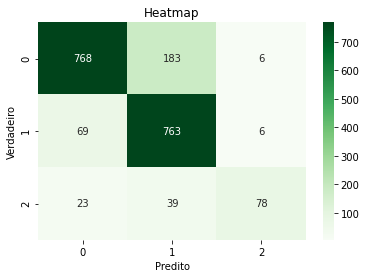

In [ ]:
# Plotando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = '.3g')
plt.title("Heatmap")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85       957
           1       0.77      0.91      0.84       838
           2       0.87      0.56      0.68       140

    accuracy                           0.83      1935
   macro avg       0.84      0.76      0.79      1935
weighted avg       0.84      0.83      0.83      1935



##CatBoost - Categorical Boost

In [ ]:
!pip install catboost
clear_output()

In [ ]:
# Importando o CatBoostClassifier 
from catboost import CatBoostClassifier

In [ ]:
# creating validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, stratify = y_train, random_state = 42)

In [ ]:
tunned_model = CatBoostClassifier(
    loss_function = 'MultiClass',
#    thread_count = -1, 
    random_seed=42,
#    iterations=3000,
#    l2_leaf_reg=3,
#    bagging_temperature=1,
#    random_strength=1,
#    leaf_estimation_method='Newton'
)

tunned_model.fit(
    x_train, y_train,
    verbose=500,
    eval_set=(x_val, y_val),
    early_stopping_rounds = 100
)

Learning rate set to 0.111046
0:	learn: 0.9976285	test: 1.0010656	best: 1.0010656 (0)	total: 149ms	remaining: 2m 29s
500:	learn: 0.1261058	test: 0.3611761	best: 0.3611761 (500)	total: 32.7s	remaining: 32.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3605706442
bestIteration = 550

Shrink model to first 551 iterations.


In [ ]:
y_cat_pred = tunned_model.predict(x_test)

In [ ]:
print("A acurácia do modelo é de: ", accuracy_score(y_test, y_cat_pred))

A acurácia do modelo é de:  0.8480620155038759


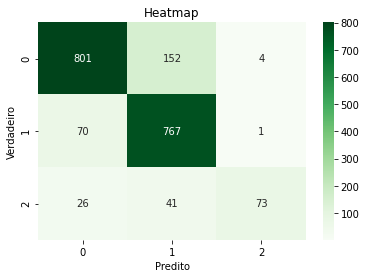

In [ ]:
cm = confusion_matrix(y_test, y_cat_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = '.3g')
plt.title("Heatmap")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

In [ ]:
print(classification_report(y_test, y_cat_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       957
           1       0.80      0.92      0.85       838
           2       0.94      0.52      0.67       140

    accuracy                           0.85      1935
   macro avg       0.88      0.76      0.80      1935
weighted avg       0.86      0.85      0.85      1935



#Ver se é necessário fazer tudo com o PV-DM

Se for necessário, tá quase feito. A acurácia deu muito menor que no PV-DBOW.

In [ ]:
from tqdm import tqdm

In [ ]:
def vetor_inferido(texto):

  string = str(texto).split()

  inferido = model_dm.infer_vector(string, steps = 20, alpha = 0.025)
  
  vetores = np.array(inferido)

  return vetores

In [ ]:
data['infered'] = data['text'].apply(lambda x: vetor_inferido(x))

NameError: ignored

In [ ]:
for i in range(0, 100):
  data[str(i)] = np.vstack(data.loc[:, 'infered'])[:, i]

In [ ]:
data.head(5)

##Regressão Logística

In [ ]:
# Instanciando o modelo de Regressão Logística em que será feito o cross-validaton em seguida
log_reg = LogisticRegression(max_iter = 1000,
                             random_state = 42, 
                             solver = 'liblinear')

log_reg

In [ ]:
# Definindo o espaço de busca de parâmetros
space = dict()
space['solver'] = ['liblinear', 'lbfgs']
space['penalty'] = ['l1', 'l2']
space['C'] = np.logspace(-3, 3, 100)

rscv = RandomizedSearchCV(log_reg, space, cv = 4, n_jobs = -1, verbose = 1, random_state = 42, n_iter = 100)

# Fazendo o cross-validation
result = rscv.fit(x_train, y_train)

In [ ]:
# Melhores hiperparâmetros
print('Melhor acurácia: %s' % result.best_score_)
print('Melhores Hiperparâmetros: %s' % result.best_params_)

In [ ]:
log_reg = LogisticRegression(penalty = result.best_params_['penalty'],
                             C = result.best_params_['C'],
                             solver = result.best_params_['solver'],
                             max_iter = 10000,
                             random_state = 42)

# Treinando os modelos com os melhores hiperparâmetros
log_reg.fit(x_train, y_train)

In [ ]:
# y hat - predicted values for y
y_pred = log_reg.predict(x_test)
y_pred[:5]

In [ ]:
print("A acurácia do modelo é: ", accuracy_score(y_test, y_pred))

In [ ]:
# Plotando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = '.3g')
plt.title("Heatmap")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))